# Liver Cirrhosis Prediction

## Shanna Badhesha 

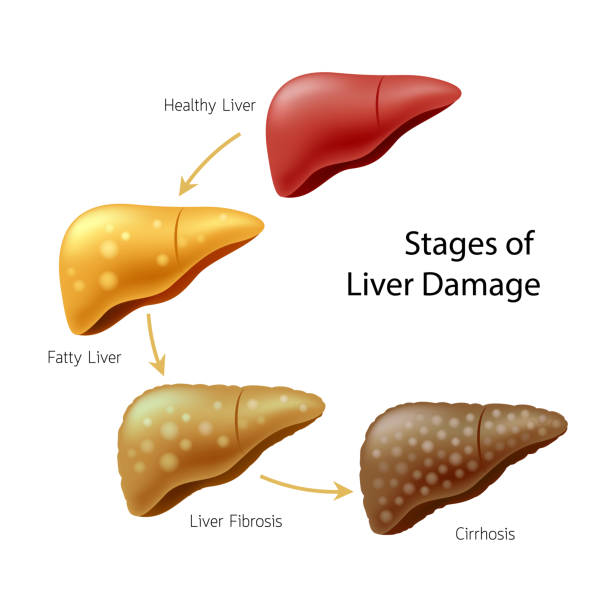

## Table of Contents

- [Introduction](#Introduction)
- [Import Libraries](#Import-Libraries)
- [Dataset](#Dataset)
    - [Load the dataset](#Load-the-dataset)
    - [Exploring the dataset](#Exploring-the-dataset)
    - [Data type & distribution](#Data-type-&-distribution)
- [Data Cleaning](#Data-cleaning)
    - [Missing values in numerical data](#Missing-values-in-numerical-data)
    - [Missing values in categorical data](#Missing-values-in-categorical-data)
    - [Convert Age from days to years](#Convert-Age-from-days-to-years)
    - [Imbalance data](#Imbalance-data)
    - [Correlated data](#Correlated-data)
    - [Label encoding](#Label-encoding)
    - [Outliers](#Outliers)
    - [Features Distribution](#Features-Distribution)
- [Model Selection](#Model-Selection)
    - [Dataset split](#Dataset-split)
    - [Standardization](#Standardization)
    - [Best Model Selection](#Best-Model-Selection)

Add in the model I picked


- [Conclusion](#Conclusion)
- [References](#References)

## Introduction

Liver cirrhosis is severe scarring of the liver that is caused by conditions such as hepatitis B and C infections, excessive alcohol consumption, non-alcoholic fatty liver disease and autoimmune hepatitis. Although liver cirrhosis is not reversible, early diagnosis of it can stop further cirrhosis [[1]](https://www.mayoclinic.org/diseases-conditions/cirrhosis/symptoms-causes/syc-20351487). About 4.5 million adults have been diagnosed in the United States, but it is suspected that 80-100 million undiagnosed adults have some form of liver disease that can cause cirrhosis [[2]](https://www.cdc.gov/nchs/fastats/liver-disease.htm). 

There are 4 stages of liver disease[[1]](https://www.mayoclinic.org/diseases-conditions/cirrhosis/symptoms-causes/syc-20351487). 
- Stage 1: Beginning of liver disease where there is some inflammation of the liver. This stage is reversible with proper treatment. 
- Stage 2: Moderate Liver Damage where there is some scar tissue forming. This stage is reversible with proper treatment 
- Stage 3: Significant Liver Damage where there is a significant amount of scarred tissue. This stage may be reversible. 
- Stage 4: Severe Liver Damage (Cirrhosis)

The dataset I am using for my model can be found in the book "Counting Processes and Survival Analysis" by Thomas R. Fleming and David P. Harrington. It is also stored on Kaggle [[3]](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset). The study was conducted between 1974 and 1984 and contains 424 patients. Six patients were lost to follow up. 106 patients did not participate in the study, but did agree to taking basic measurements [[4]](https://onlinelibrary.wiley.com/doi/epdf/10.1002/9781118150672.app4). 

Certain factors can be used as indicators for stages of liver disease. 
- Sex: Men are twice as likely to have liver cirrhosis because they are more likely to have hepatitis and consume more alcohol in general [[5]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3992057/).
- Ascites: refers to fluid accumulation in the peritoneal cavity. It is a common complication of liver cirrhosis and takes on average 10 years to develop. 80% of ascites cases are caused by cirrhosis [[6]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3860926/). 
- Hepatomegaly: refers to an enlarged liver and can be an indicator of liver disease or cirrhosis [[7]](https://www.mayoclinic.org/diseases-conditions/enlarged-liver/symptoms-causes/syc-20372167).
- Spiders: can indicate an underlying disease such as cirrhosis or arthritis. About 33% of those with cirrhosis have spiders [[8]](https://www.ncbi.nlm.nih.gov/books/NBK507818/)
- Edema: liver cirrhosis can slow the flow of blood in the liver which can then lead to swelling in the legs and abdomen, called edema. This will happen to about 50% of people diagnosed within 10 years of being diagnosed with liver cirrhosis [[9]](https://academic.oup.com/qjmed/article/101/2/71/1601382). 
- Bilirubin: elevated levels of bilirubin can be indicative of liver cirrhosis. Total levels are normally around 0.1 to 1.2 mg/dL [[10]](https://www.ncbi.nlm.nih.gov/books/NBK548598/). 
- Cholesterol: high levels of cholesterol can lead to fatty liver disease which can eventually cause cirrhosis. The normal range for total cholestrol is less than 170mg/dL [[11]](https://keck.usc.edu/high-cholesterol-leads-to-long-term-liver-scarring-and-immune-cell-dysfunction-in-lab-study/#:~:text=Excess%20cholesterol%20accelerates%20damage%20of,of%20Medicine%20of%20USC%20research&text=There's%20a%20long%2Destablished%20link,as%20cirrhosis%20and%20liver%20cancer.). 
- Albumin: levels will decrease as cirrhosis gets worse. The normal range is 3.4 to 5.4 g/dL (34 to 54 g/L) [[12]](https://www.elsevier.es/en-revista-annals-hepatology-16-articulo-position-statement-on-the-use-S1665268122000503). 
- Copper: excess amounts of copper leads to liver damage and as the liver tries to repair itself, cirrhosis forms. The normal range is 62 to 140 micrograms per deciliter (mcg/dL) [[13]](https://www.mayoclinic.org/diseases-conditions/wilsons-disease/symptoms-causes/syc-20353251#:~:text=Scarring%20of%20the%20liver%20(cirrhosis,for%20the%20liver%20to%20function.). 
- Alk_Phos: high levels of this indicate a blockage in the bilary tract. It is not a director indicator of liver cirrhosis though [[14]](https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-alkaline-phosphatase.asp).
- SGOT: this is an enzyme created by the liver. When the liver is damaged, SGOT can leak into the bloodstream. High levels of SGOT can be an indictor of liver damage. There are some people with cirrhosis, but normal SGOT levels. The normal range is 8 and 45 units per liter of serum [[15]](https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-AST.asp). 
- Triglycerides: high amounts indicate fatty liver which may eventually lead to liver cirrhosis [[16]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4213382/). 
- Platelets: low platelet counts can be an indictor of liver cirrhosis. Lower levels would indicate worse liver cirrhosis. The normal range is 50,000 to 450,000 platelets per microliter of blood [[17]](https://ashpublications.org/hematology/article/2022/1/296/493505/Thrombocytopenia-and-liver-disease-pathophysiology). 
- Prothrombin: high levels of this indicate liver cirrhosis. When the liver is damaged, it cannot make the appropriate amount of blood clotting proteins [[18]](https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-prothrombin-time.asp#:~:text=When%20the%20PT%20is%20high,serious%20liver%20damage%20or%20cirrhosis.). 
- D-penicillamine: this can stop fibrogenesis and decreased incidence of scar lesions in the liver [[19]](https://pubmed.ncbi.nlm.nih.gov/19338486/#:~:text=D%2Dpenicillamine%20primarily%20can%20inhibit,scar%20lesions%20in%20the%20liver.). 

Liver cirrhosis can be life threatening if left untreated. Predicting the stage of liver cirrhosis can help guide medical management and determine appropriate interventions to manage complications. Using this dataset, I examined the features correlation and distribution to determine which would be best in predicting stages of liver cirrhosis. 

This model was completed using python in the jupyter notebook. 

Below is a step-by-step explanation of the model I created to predict liver cirrhosis using clinical symptoms, laboratory results, demographics and treatment. 

## Import Libraries

Below I am importing the libraries needed for the model. I provided a brief description of each library. 

In [1]:
#magic function that will plot commands inline
%matplotlib inline

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#scientific computing library
import numpy as np

#data manipulation
import pandas as pd

import imblearn as imblearn

#splits data into training and testing subsets
from sklearn.model_selection import train_test_split

#standardize the data
from sklearn.preprocessing import StandardScaler

#used for builiding logisitc regression models
from sklearn.linear_model import LogisticRegression

#provides functions to test the performance of our machine learning model
from sklearn import metrics

#pipeline of machine learning tasks
from sklearn.pipeline import Pipeline

#Principal component analysis to reduce dimensionality
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter


## Load the Dataset

We will begin by loading in the dataset that we will be using. We can download the dataset from the Kaggle link listed in the introduction section. In this case, my csv was stored under the datasets directory in my environment. The df.head() command will show us the first 5 rows of the dataset. 

In [2]:
df = pd.read_csv('../datasets/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Below is some information of the 20 attributes[[3]](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset): 

1) ID: identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) Status: patient status 
    - C (censored)
    - CL (censored due to liver tx)
    - D (death)
4) Drug: drug type 
    - D-penicillamine 
    - placebo
5) Age: age in (days)
6) Sex: 
    - M (male) 
    - F (female)
7) Ascites: presence of ascites 
    - N (No) 
    - Y (Yes)
8) Hepatomegaly: presence of hepatomegaly 
    - N (No) 
    - Y (Yes)
9) Spiders: presence of spiders 
    - N (No) 
    - Y (Yes)
10) Edema: presence of edema 
    - N (no edema and no diuretic therapy for edema) 
    - S (edema present without diuretics, or edema resolved by diuretics)
    - Y (edema despite diuretic therapy)
11) Bilirubin: measured in (mg/dl)
12) Cholesterol: measured in (mg/dl)
13) Albumin: measured in (mg/dl)
14) Copper: measured in (ug/day)
15) Alk_Phos: measured in (U/liter)
16) SGOT: measured in (U/ml)
17) Triglycerides: measured in (mg/dl)
18) Platelets: platelets per cubic (ml/1000)
19) Prothrombin: prothrombin time in seconds (s)
20) Stage: histologic stage of disease (1, 2, 3, or 4) 
    - This will be the target in our model. Stages 1-3 will represent no cirrhosis and stage 4 will represent cirrhosis. 

## Exploring the dataset

We will now start exploring the dataset. In this section, we will analyze the correlation, data type, distribution and missing values. 

In [3]:
df.shape

(418, 20)

'df.shape' shows us the number of rows and columns respectively. There are 418 rows and 20 columns. 

In [4]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []


By running the code above, we can check for duplicates. Since this returns an empty dataframe, there are no duplicates in our dataset that need to be addressed. 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


From this summary, we are able to see that some of these have a large range and standard deviation implying that the data may be skewed. We will address this below. 

### Data Types

'df.info()' lists the column names, the number of non-missing values and if the type data it is. 'int64' and 'float64' represent numerical data. 'Object' represents the categorical data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

Numerical:
- ID
- N_Days
- Age
- Bilirubin
- Cholesterol
- albumin
- copper
- alk_phos
- SGOT
- Triglycerides
- Platelets
- Prothrombin
- Stage (target)

Categorical: 
- Status
- Drug
- Sex
- Ascites
- Hepatomegaly
- Spiders
- Edema

## Data Preprocessing

### Missing Values

In [9]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

From the non-null count column above, we can see that there are some missing values since they do not all equal 418. We will calculate the number of missing values in the dataset. We see that about 25% of the data is missing for 9 columns. Since it makes up such a large portion of our dataset and it is already a small dataset, we can't remove the rows with the missing data. 

We will go through each of the attributes in the dataset and decide how to deal with the null values. 

#### 1. ID: 

In [10]:
df['ID'].isnull().sum()

0

There are no missing values in the ID column. Since we already checked if there are any duplicates we can remove this column. It will not be useful for our model.

#### 2. N_days: 

In [11]:
df['N_Days'].isnull().sum()

0

This attribute may be useful in analyzing the survival of patients with liver disease but not predicting different stages of liver disease. It will not help with our question and will be removed. 

#### 3. Status: 

In [12]:
df['Status'].isnull().sum()

0

For the same reason mentioned above, we will remove this feature. 

#### 4. Drug: 

In [13]:
df['Drug'].isnull().sum()

106

In [14]:
df['Drug'].dtype.name

'object'

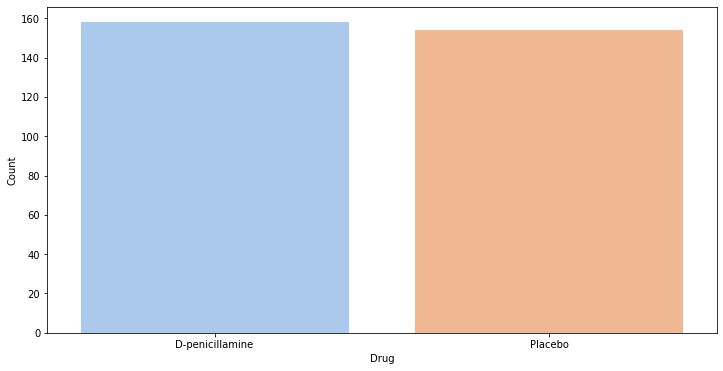

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x= df["Drug"], palette="pastel")
plt.xlabel('Drug')
plt.ylabel('Count');

This is a categorical attribute. We will use the mode to fill in the null values. 

#### 5. Age: 

In [16]:
df['Age'].isnull().sum()

0

In [17]:
df['Age'].dtype.name

'int64'

There are no missing values for this attribute, but the values are listed in days. We will convert the days to years in a later step. 

#### 6. Sex: 

In [18]:
df['Sex'].isnull().sum()

0

There is no missing data for this attribute. 

#### 7. Ascites: 

In [19]:
df['Ascites'].isnull().sum()

106

In [20]:
df['Ascites'].dtype.name

'object'

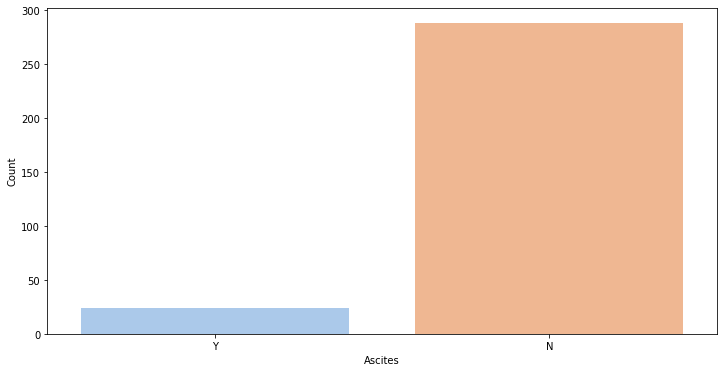

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x= df["Ascites"], palette="pastel")
plt.xlabel('Ascites')
plt.ylabel('Count');

This is a categorical attribute. There are 106 missing values. To replace these, we will use the mode. 

#### 8. Hepatomegaly: 

In [22]:
df['Hepatomegaly'].isnull().sum()

106

In [23]:
df['Hepatomegaly'].dtype.name

'object'

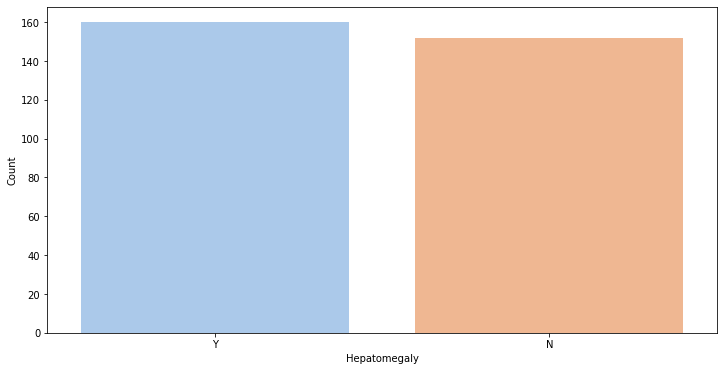

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x= df["Hepatomegaly"], palette="pastel")
plt.xlabel('Hepatomegaly')
plt.ylabel('Count');

This is a categorical attribute. There are 106 missing values. To replace these, we will use the mode. 

#### 9. Spiders: 

In [25]:
df['Spiders'].isnull().sum()

106

In [26]:
df['Spiders'].dtype.name

'object'

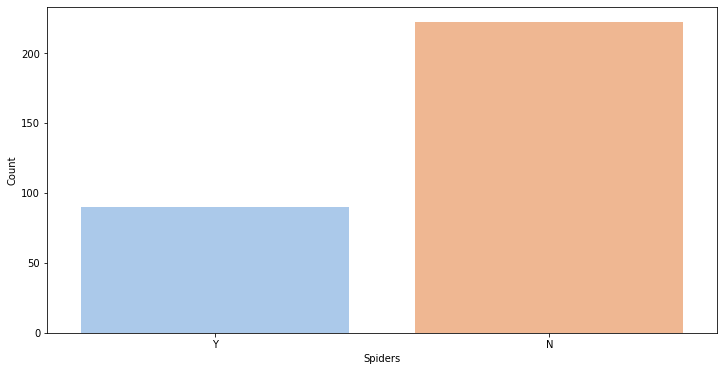

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x= df["Spiders"], palette="pastel")
plt.xlabel('Spiders')
plt.ylabel('Count');

This is a categorical attribute. There are 106 missing values. To replace these, we will use the mode. 

#### 10. Edema: 

In [28]:
df['Edema'].isnull().sum()

0

There is no missing data for this attribute. 

#### 11. Bilirubin: 

In [29]:
df['Bilirubin'].isnull().sum()

0

There is no missing data for this attribute. 

#### 12. Cholesterol: 

In [30]:
df['Cholesterol'].isnull().sum()

134

In [31]:
df['Cholesterol'].dtype.name

'float64'

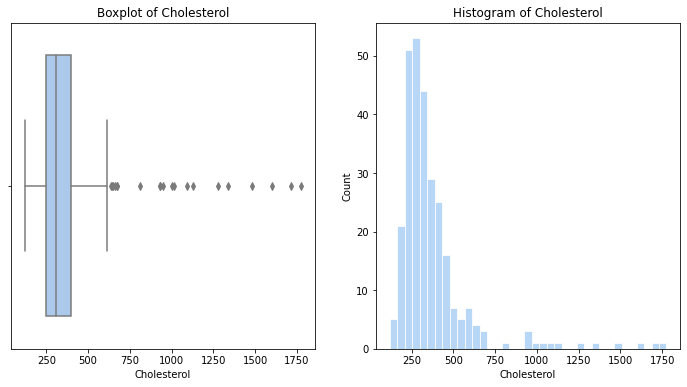

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")
sns.boxplot(data=df, x='Cholesterol', ax=ax1)
ax1.set(title='Boxplot of Cholesterol')

sns.histplot(data=df, x='Cholesterol', ax=ax2)
ax2.set(title='Histogram of Cholesterol')

plt.show()

There are 134 missing values for this attribute. It is a numerical category, so we can either use the mean or median to replace the missing values in this category. I used a boxplot and histogram to evaluate the distribution. Since the data is skewed, it will be best to use the median to replace the missing values. The median is not as sensitive to outliers as the mean is. 

#### 13. Albumin: 

In [33]:
df['Albumin'].isnull().sum()

0

There is no missing data for this attribute. 

#### 14. Copper: 

In [34]:
df['Copper'].isnull().sum()

108

In [35]:
df['Copper'].dtype.name

'float64'

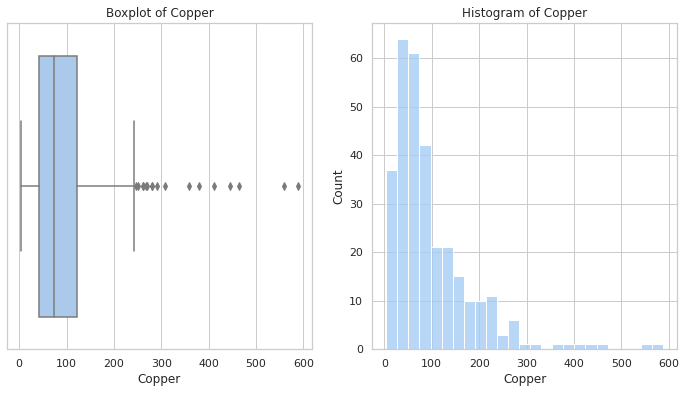

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")
sns.boxplot(data=df, x='Copper', ax=ax1)
ax1.set(title='Boxplot of Copper')

sns.histplot(data=df, x='Copper', ax=ax2)
ax2.set(title='Histogram of Copper')

plt.show()

There are 108 missing values for this attribute. It is a numerical category, so we can either use the mean or median to replace the missing values in this category. I used a boxplot and histogram to evaluate the distribution. Since the data is skewed, it will be best to use the median to replace the missing values. The median is not as sensitive to outliers as the mean is. 

#### 15. Alk_phos: 

In [37]:
df['Alk_Phos'].isnull().sum()

106

In [38]:
df['Alk_Phos'].dtype.name

'float64'

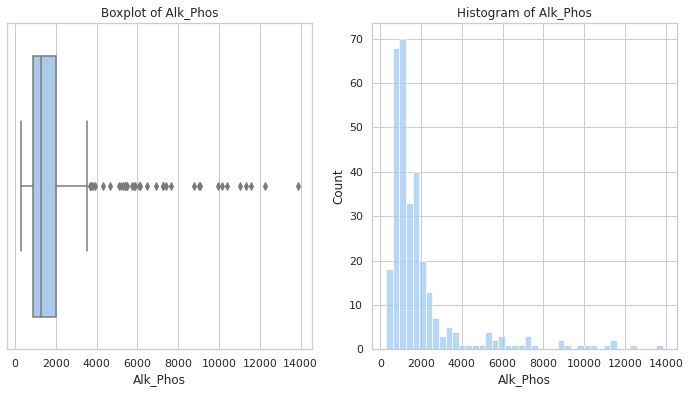

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")
sns.boxplot(data=df, x='Alk_Phos', ax=ax1)
ax1.set(title='Boxplot of Alk_Phos')

sns.histplot(data=df, x='Alk_Phos', ax=ax2)
ax2.set(title='Histogram of Alk_Phos')

plt.show()

There are 106 missing values for this attribute. It is a numerical category, so we can either use the mean or median to replace the missing values in this category. I used a boxplot and histogram to evaluate the distribution. Since the data is skewed, it will be best to use the median to replace the missing values. The median is not as sensitive to outliers as the mean is. 

#### 16. SGOT: 

In [40]:
df['SGOT'].isnull().sum()

106

In [41]:
df['SGOT'].dtype.name

'float64'

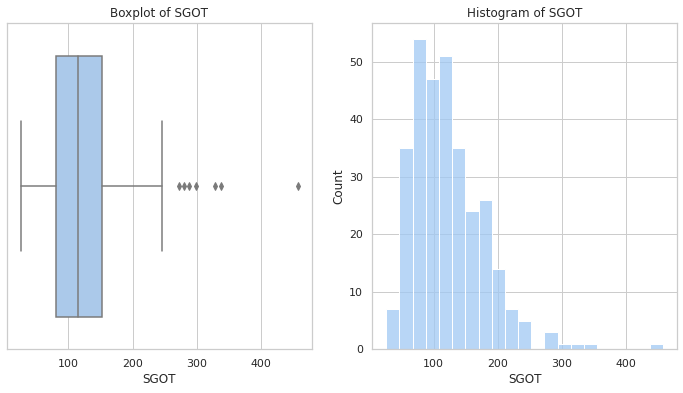

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")
sns.boxplot(data=df, x='SGOT', ax=ax1)
ax1.set(title='Boxplot of SGOT')

sns.histplot(data=df, x='SGOT', ax=ax2)
ax2.set(title='Histogram of SGOT')

plt.show()

There are 106 missing values for this attribute. It is a numerical category, so we can either use the mean or median to replace the missing values in this category. I used a boxplot and histogram to evaluate the distribution. Since the data is skewed, it will be best to use the median to replace the missing values. The median is not as sensitive to outliers as the mean is. 

#### 17. Triglycerides: 

In [43]:
df['Tryglicerides'].isnull().sum()

136

In [44]:
df['Tryglicerides'].dtype.name

'float64'

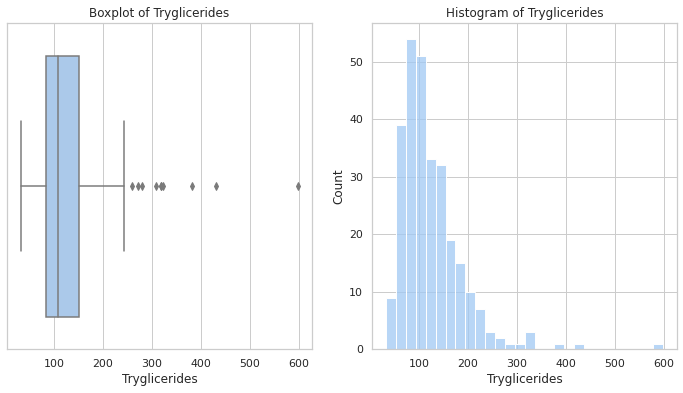

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")
sns.boxplot(data=df, x='Tryglicerides', ax=ax1)
ax1.set(title='Boxplot of Tryglicerides')

sns.histplot(data=df, x='Tryglicerides', ax=ax2)
ax2.set(title='Histogram of Tryglicerides')

plt.show()

There are 136 missing values for this attribute. It is a numerical category, so we can either use the mean or median to replace the missing values in this category. I used a boxplot and histogram to evaluate the distribution. Since the data is skewed, it will be best to use the median to replace the missing values. The median is not as sensitive to outliers as the mean is. 

#### 18. Platelets: 

In [46]:
df['Platelets'].isnull().sum()

11

In [47]:
df['Platelets'].dtype.name

'float64'

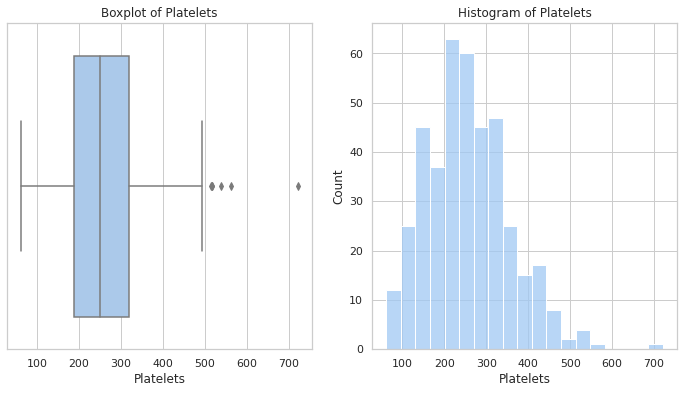

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")
sns.boxplot(data=df, x='Platelets', ax=ax1)
ax1.set(title='Boxplot of Platelets')

sns.histplot(data=df, x='Platelets', ax=ax2)
ax2.set(title='Histogram of Platelets')

plt.show()

There are 11 missing values for this attribute. It is a numerical category, so we can either use the mean or median to replace the missing values in this category. I used a boxplot and histogram to evaluate the distribution. Since the data is skewed, it will be best to use the median to replace the missing values. The median is not as sensitive to outliers as the mean is. 

#### 19. Prothrombin: 

In [49]:
df['Prothrombin'].isnull().sum()

2

In [50]:
df['Prothrombin'].dtype.name

'float64'

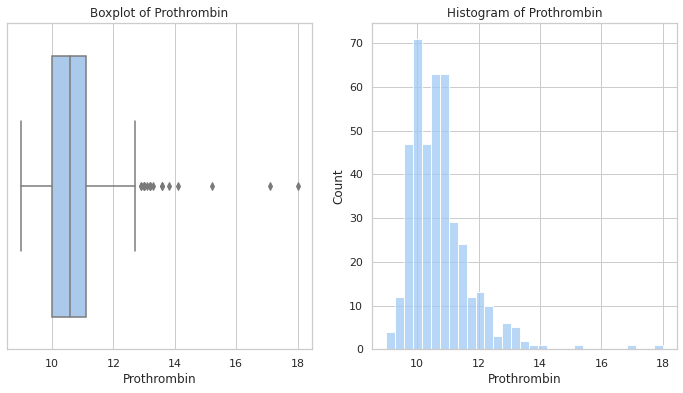

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel")
sns.boxplot(data=df, x='Prothrombin', ax=ax1)
ax1.set(title='Boxplot of Prothrombin')

sns.histplot(data=df, x='Prothrombin', ax=ax2)
ax2.set(title='Histogram of Prothrombin')

plt.show()

There are 2 missing values for this attribute. It is a numerical category, so we can either use the mean or median to replace the missing values in this category. I used a boxplot and histogram to evaluate the distribution. Since the data is skewed, it will be best to use the median to replace the missing values. The median is not as sensitive to outliers as the mean is. 

#### 20. Stage(Target):

In [52]:
df['Stage'].isnull().sum()

6

There are only 6 missing values in our target data which is about 1.4% of our total data. I decided to remove the missing values.

### Handling missing values

In this section, the following will be done: 

- Remove the "ID", "N_Days", and "Status" column
- Remove the row with missing values from the "Stage" column
- Replace the missing values in the categorical data with the mode
- Replace the missing values in the numerical data with the median

In [53]:
#Remove the "ID", "N_Days", and "Status" column
df_copy = df.copy()
df2 = df_copy.drop(["ID","N_Days","Status"],axis=1)
df2.shape

(418, 17)

In [54]:
#Remove the row with missing values from the "Stage" column

df2 = df2.dropna(subset=['Stage'])
df2.shape

(412, 17)

In [55]:
#Replace the missing values in the categorical data with the mode

for col in df2.select_dtypes(include='object').columns:
    if df2[col].isnull().sum() > 0:
        mode_val = df2[col].mode()[0]
        df2[col].fillna(mode_val, inplace=True)

In [56]:
df2.isnull().sum()

Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

In [57]:
#Replace the missing values in the numerical data with the median

for col in df2.columns:
    if df2[col].dtype in ['float64', 'int64']:
        df2[col].fillna(df2[col].median(), inplace=True)

In [58]:
df2.isnull().sum()

Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### Convert ['Age'] from days to years

We will convert the age column from days to years to be consisten and use the standard unit of measurement for Age. This will make it easier to understand and interpret data.

In [59]:
df2['Age'] = (df2['Age'] / 365.25).round()
df2.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Outliers

In this section, we will determine if any outliers need to be removed. All the numerical data we looked at earlier appeared skewed. As a reminder, I will list the numerical columns below.

In [60]:
num_cols2= df2.select_dtypes(include=['int64', 'float64']).columns
num_cols2

Index(['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [61]:
for column in num_cols2:
    desc = df2[column].describe()
    q1 = desc['25%']
    q3 = desc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_outliers = len(df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)])
    print(f"'{column}' has {num_outliers} outliers.")

'Age' has 0 outliers.
'Bilirubin' has 46 outliers.
'Cholesterol' has 45 outliers.
'Albumin' has 9 outliers.
'Copper' has 43 outliers.
'Alk_Phos' has 44 outliers.
'SGOT' has 23 outliers.
'Tryglicerides' has 40 outliers.
'Platelets' has 5 outliers.
'Prothrombin' has 18 outliers.
'Stage' has 0 outliers.


Here we listed the number of outliers in our dataframe.  

### Correlated Data

By using a heatmap, we will be able to determine if any of the numerical features are highly correlated with each other or the target. This will help us decide if any of the features need to be removed. 

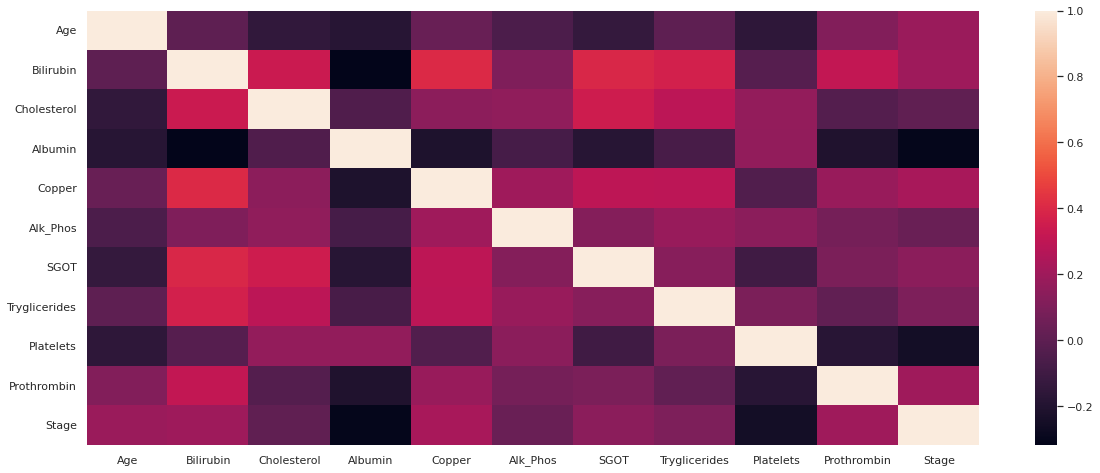

In [62]:
df2.corr()

plt.figure(figsize=(20,8))
sns.heatmap(df2.corr());

We will create another heatmap that includes the correlation coefficients for better visualization. 

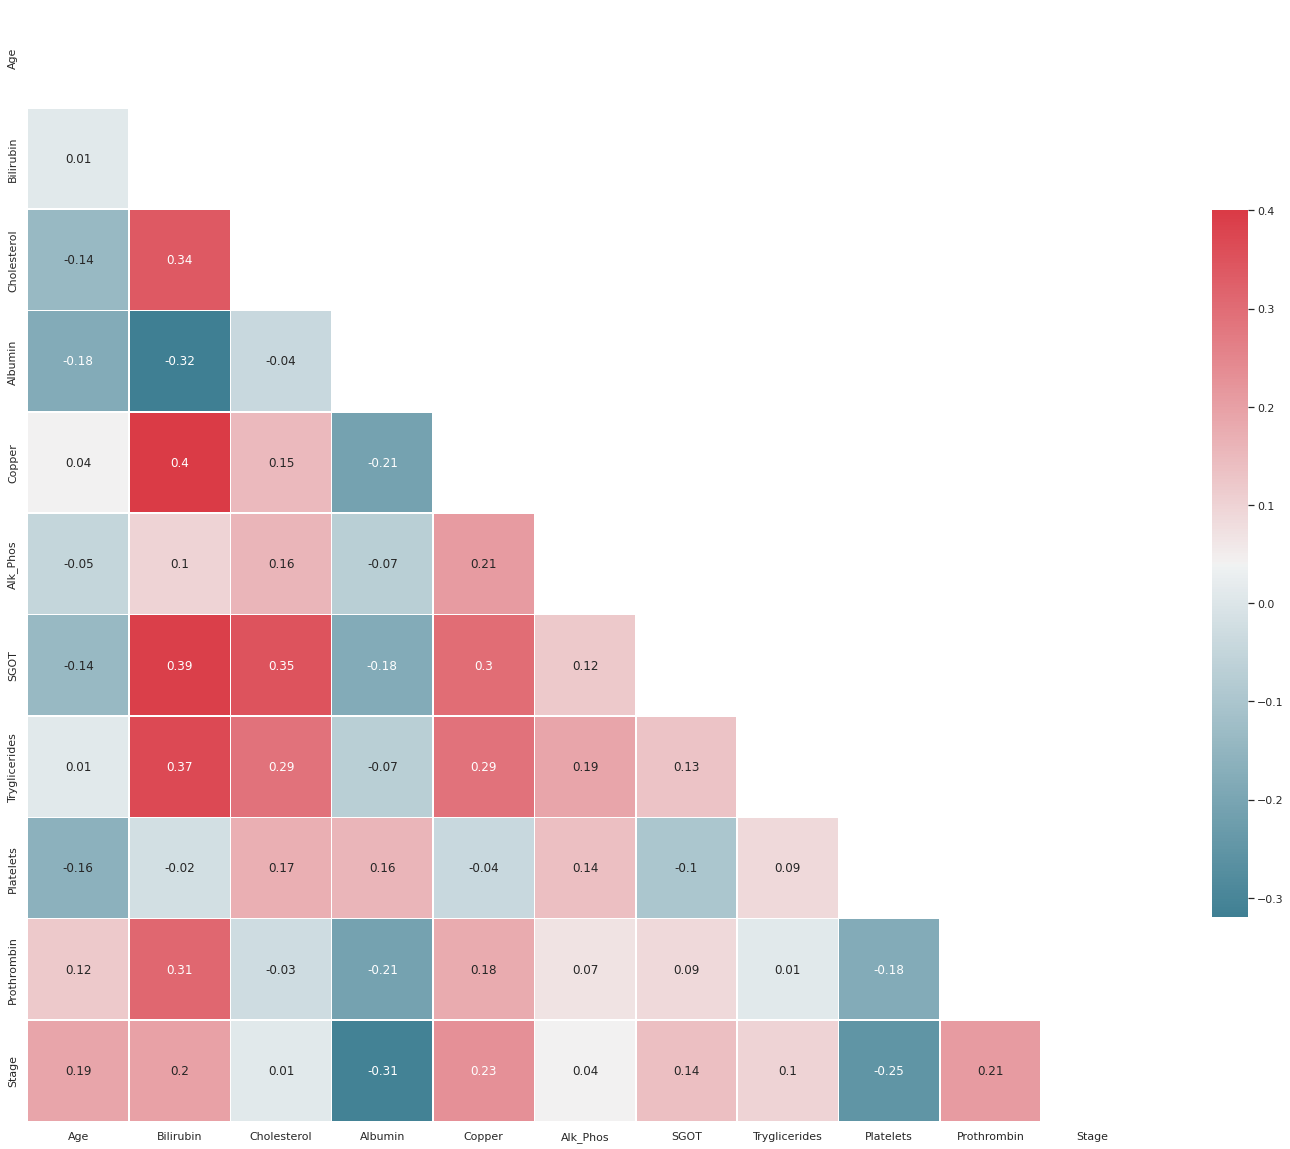

In [63]:
corr2 = df2.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr2, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Based off this heatmap, none of the features are highly correlated with each other. I have decided to not take out any features at this point since none of them are highly correlated. We can also use a pairplot to determine if any of the features are highly correlated and need to be removed.  

### Label Encoding

In [64]:
df2.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [65]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    

In [66]:
df3 =MultiColumnLabelEncoder(columns = ['Drug','Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']).fit_transform(df2)
df3

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,67.0,0,0,1,0,0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,0,39.0,0,0,1,0,0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,0,57.0,0,0,1,0,0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,0,58.0,0,0,1,0,0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


### Class Imbalance

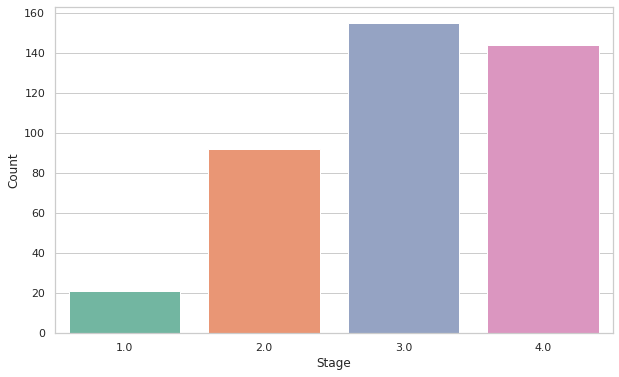

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(data=df3, x='Stage', palette="Set2")
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

In [68]:
df3['Stage'].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

There is a clear imbalance issue in our target. There are 155 stage 3 counts, 144 stage 4 counts, 92 stage 2 counts and 21 stage 1 counts. Since this is already a small dataset, I will choose to implement random oversampling on the minority groups. I have decided to merge stages 1, 2, 3 and stage 4 will be liver cirrhosis. 1 is the ppl with liver cirrhosis and 0 is the ppl with stage 1-3. 

In [69]:
df3['Stage'] = np.where(df3['Stage'] == 4, 1, 0)

In [70]:
df3['Stage'].value_counts()

0    268
1    144
Name: Stage, dtype: int64

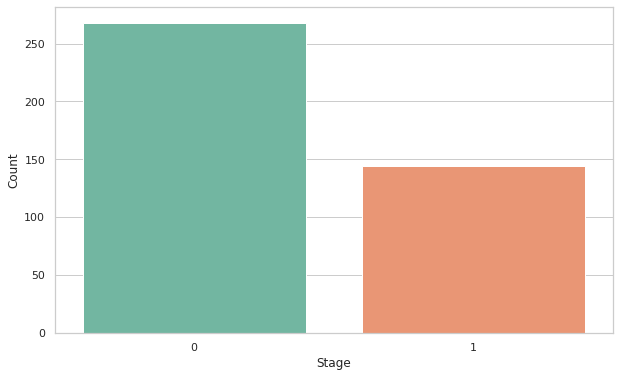

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(data=df3, x='Stage', palette="Set2")
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

#### Set up features and target

In [72]:
X= df3.drop(['Stage'], axis = 1)
Y = df3['Stage']

In [73]:
X

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,67.0,0,0,1,0,0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9
414,0,39.0,0,0,1,0,0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2
415,0,57.0,0,0,1,0,0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9
416,0,58.0,0,0,1,0,0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4


In [74]:
Y

0      1
1      0
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Stage, Length: 412, dtype: int64

## Deal with imbalanced dataset

In [75]:
sm = SMOTE(k_neighbors = 4)
print('Original dataset shape %s' % Counter(Y))
X, Y = sm.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y))

Original dataset shape Counter({0: 268, 1: 144})
Resampled dataset shape Counter({1: 268, 0: 268})


In [76]:
X.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9


In [77]:
Y.value_counts()

1    268
0    268
Name: Stage, dtype: int64

### Set up Training and Testing datasets

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (375, 16), X_test size: (161, 16)


In [79]:
X_train.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
57,0,45.0,1,0,0,0,0,0.7,242.0,4.08,73.0,5890.0,56.76,118.0,249.0,10.6
227,1,37.0,0,0,0,0,0,0.7,215.0,3.35,41.0,645.0,93.00,74.0,165.0,9.6
24,1,45.0,0,0,0,0,0,0.7,298.0,4.10,40.0,661.0,106.95,66.0,324.0,11.3
17,0,54.0,0,0,1,1,2,11.4,178.0,2.80,588.0,961.0,280.55,200.0,283.0,12.4
210,1,53.0,0,0,0,0,0,1.3,309.5,3.76,27.0,1282.0,100.75,108.0,114.0,10.3


In [80]:
X_test.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
117,0,49.0,0,0,1,0,0,3.5,390.0,3.30,67.0,878.0,137.95,93.0,207.0,10.2
132,1,63.0,1,0,0,0,0,1.5,331.0,3.95,13.0,577.0,128.65,99.0,165.0,10.1
154,1,44.0,0,0,1,1,1,0.6,220.0,3.35,57.0,1620.0,153.45,80.0,311.0,11.2
245,0,33.0,0,0,1,0,0,2.1,387.0,3.77,63.0,1613.0,150.35,33.0,185.0,10.1
84,1,47.0,0,0,1,0,0,2.1,262.0,3.48,58.0,2045.0,89.90,84.0,225.0,11.5


In [81]:
Y_train.head()

57     0
227    0
24     0
17     1
210    0
Name: Stage, dtype: int64

In [82]:
Y_test .head()

117    0
132    1
154    1
245    1
84     1
Name: Stage, dtype: int64

### StandardScaler

In [83]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Using GridSearchCV, we will determine what the best model for this dataset is. Using supervised learning algorithms. 

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [85]:
lr_params = {'C': [0.1, 1, 10]}
dt_params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]}

In [86]:
models = {
    'Logistic Regression': (LogisticRegression(), lr_params),
    'Decision Tree': (DecisionTreeClassifier(), dt_params),
    'Random Forest': (RandomForestClassifier(), rf_params),
    'Support Vector Machine': (SVC(), svm_params),
    'K-Nearest Neighbors': (KNeighborsClassifier(), knn_params),
    'Gradient Boosting': (GradientBoostingClassifier(), gb_params),
}

In [87]:
model_names = []
train_acc_scores = []

for model_name, (model, params) in models.items():
    print('Training', model_name)
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, Y_train)
    print('Best parameters:', grid.best_params_)
    print('Training accuracy:', grid.best_score_)
    
    model_names.append(model_name)
    train_acc_scores.append(grid.best_score_)

Training Logistic Regression
Best parameters: {'C': 0.1}
Training accuracy: 0.736
Training Decision Tree
Best parameters: {'max_depth': 3, 'min_samples_split': 2}
Training accuracy: 0.7386666666666667
Training Random Forest
Best parameters: {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}
Training accuracy: 0.8133333333333332
Training Support Vector Machine
Best parameters: {'C': 10, 'kernel': 'rbf'}
Training accuracy: 0.7813333333333332
Training K-Nearest Neighbors
Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Training accuracy: 0.752
Training Gradient Boosting
Best parameters: {'learning_rate': 1.0, 'max_depth': 7, 'n_estimators': 100}
Training accuracy: 0.8266666666666665


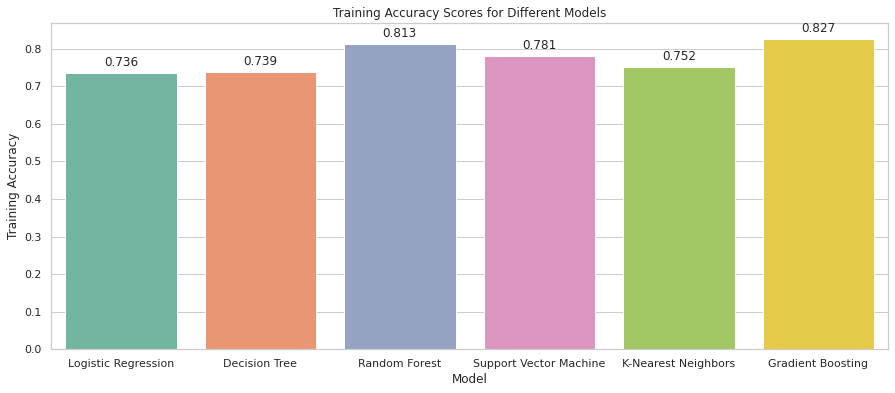

In [88]:
plt.figure(figsize=(15,6))
sns.barplot(x=model_names, y=train_acc_scores, palette="Set2")
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Scores for Different Models')
ax = plt.gca()
for i, score in enumerate(train_acc_scores):
    ax.text(i, score+0.01, '{:.3f}'.format(score), ha='center', va='bottom')

plt.show()

Gradient Boosting performed the best out of all the models. 

In [94]:
gb = GradientBoostingClassifier(n_estimators=grid.best_params_['n_estimators'], 
                                learning_rate=grid.best_params_['learning_rate'], 
                                max_depth=grid.best_params_['max_depth'])
gb.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=7)

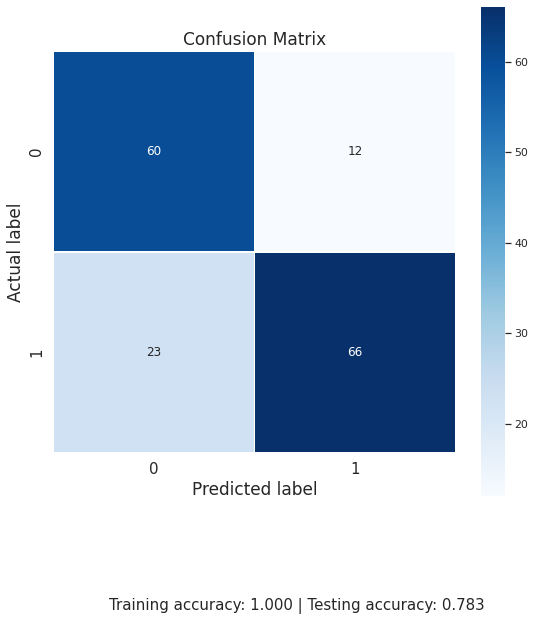

In [95]:
cm = metrics.confusion_matrix(Y_test, gb.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
plt.title('Confusion Matrix', size=17)
plt.tick_params(labelsize=15)

training_acc = gb.score(X_train, Y_train);
testing_acc = gb.score(X_test, Y_test);
plt.figtext(0.5, -0.05, f'Training accuracy: {training_acc:.3f} | Testing accuracy: {testing_acc:.3f}',
            ha='center', fontsize=15);

In [104]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

The training accuracy is 1 which is a clear indicator that there is an overfitting issue. In this section, we will explore options to reduce overfitting.

I will be focusing on the following hyperparameters:
    n_estimators , learning_rate max_depth 

In [102]:
gb_params = {'n_estimators': randint(50, 200),
             'learning_rate': [0.01, 0.1, 0.5],
             'max_depth': randint(3, 8)}

gb = GradientBoostingClassifier()
random_gb = RandomizedSearchCV(gb, param_distributions=gb_params, cv=5, n_iter=10)
random_gb.fit(X_train, Y_train)

print('Best parameters:', random_gb.best_params_)
print('Training accuracy:', random_gb.best_score_)
print('Testing accuracy:', random_gb.score(X_test, Y_test))

Best parameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 152}
Training accuracy: 0.8106666666666665
Testing accuracy: 0.7453416149068323


## Conclusion

Using Gradient Boosting Classifier we are able to get a training accuracy score of 81% and a testing score of 74.5%. Given the size of the dataset, this is a good score. For a better model, we will need a large dataset to get a better performing model. 

## References 

1. Mayo Clinic Staff. Cirrhosis. Mayo Clinic. Retrieved from https://www.mayoclinic.org/diseases-conditions/cirrhosis/symptoms-causes/syc-20351487
2. Centers for Disease Control and Prevention. FastStats - Liver Disease. Retrieved from https://www.cdc.gov/nchs/fastats/liver-disease.htm
3. Federico, A., Dallio, M., & Loguercio, C. (2021). Cirrhosis Prediction Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset
4. Kwo, P. Y., & Cohen, S. M. (Eds.). (2012). Schiff's diseases of the liver (12th ed.). Wiley-Blackwell.
5. Yasir, M., & Sondhi, S. (2013). An overview of complications and recent advances in the management of cirrhosis. North American Journal of Medical Sciences, 5(8), 430-435. doi: 10.4103/1947-2714.117299
6. Singal, A. K., Kamath, P. S., & Gores, G. J. (2013). Diagnosis and management of nonalcoholic fatty liver disease: Practice guidance from the American Association for the Study of Liver Diseases. Hepatology, 57(6), 2005-2023. doi: 10.1002/hep.26068
7. Mayo Clinic Staff. Enlarged liver (hepatomegaly). Mayo Clinic. Retrieved from https://www.mayoclinic.org/diseases-conditions/enlarged-liver/symptoms-causes/syc-20372167
8. Satapathy, S. K. (Ed.). (2018). Management of cirrhosis: a practical approach. Springer.
9. Tripathi, D. M., & Singh, R. (2008). Liver function tests and their interpretation. Indian Journal of Pediatrics, 75(4), 379-383. doi: 10.1007/s12098-008-0069-8
10. Leung, D. H., Khan, M. A., & Habib, S. (2019). Liver Disease in Pregnancy. In S. B. Overview (Ed.), Obstetric Anesthesia and Uncommon Disorders (pp. 327-336). Springer.
11. University of Southern California. High cholesterol leads to long-term liver scarring and immune cell dysfunction in lab study. Keck School of Medicine of USC. Retrieved from https://keck.usc.edu/high-cholesterol-leads-to-long-term-liver-scarring-and-immune-cell-dysfunction-in-lab-study/#:~:text=Excess%20cholesterol%20accelerates%20damage%20of,of%20Medicine%20of%20USC%20research&text=There's%20a%20long%2Destablished%20link,as%20cirrhosis%20and%20liver%20cancer.
12. Wong, F., Angeli, P., & Sanyal, A. (2021). Position statement on the use of albumin in patients with liver cirrhosis. Annals of Hepatology, 20, 100344. doi: 10.1016/j.aohep.2021.100344
13. Mayo Clinic. (n.d.). Wilson's Disease. Retrieved from https://www.mayoclinic.org/diseases-conditions/wilsons-disease/symptoms-causes/syc-20353251
14. U.S. Department of Veterans Affairs. (n.d.). Alkaline Phosphatase (ALP). Retrieved from https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-alkaline-phosphatase.asp
15. U.S. Department of Veterans Affairs. (n.d.). AST (SGOT). Retrieved from https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-AST.asp
16. Devarbhavi, H. (2014). Portal hypertension and variceal bleeding: an A to Z. Indian Journal of Gastroenterology, 33(2), 93-104. doi: 10.1007/s12664-014-0479-7
17. Hoffman, M., & Monroe, D. M. (2022). Thrombocytopenia and Liver Disease: Pathophysiology. American Society of Hematology. doi: 10.1182/hematology.2022000085
18. U.S. Department of Veterans Affairs. (n.d.). Prothrombin Time (PT). Retrieved from https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-prothrombin-time.asp
19. Kazemi K, Geramizadeh B, Nikeghbalian S, Salahi H, Bahador A, Reza Nejatollahi SM, Dehghani SM, Dehghani M, Kakaei F, Malek-Hosseini SA. Effect of D-penicillamine on liver fibrosis and inflammation in Wilson disease. Exp Clin Transplant. 2008 Dec;6(4):261-3. PMID: 19338486.